In [234]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split,GridSearchCV,KFold,cross_val_score
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.feature_selection import RFE
from sklearn import metrics
from sklearn.metrics import r2_score


In [235]:
warnings.filterwarnings("ignore")

In [236]:
df = pd.read_csv('/Users/aadyanthmasthipuram/Downloads/train.csv')
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [161]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [162]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [163]:
((df.isnull().sum()/len(df.index)).sort_values(ascending=False).head(30))*100

PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
FireplaceQu     47.260274
LotFrontage     17.739726
GarageYrBlt      5.547945
GarageCond       5.547945
GarageType       5.547945
GarageFinish     5.547945
GarageQual       5.547945
BsmtFinType2     2.602740
BsmtExposure     2.602740
BsmtQual         2.534247
BsmtCond         2.534247
BsmtFinType1     2.534247
MasVnrArea       0.547945
MasVnrType       0.547945
Electrical       0.068493
Id               0.000000
Functional       0.000000
Fireplaces       0.000000
KitchenQual      0.000000
KitchenAbvGr     0.000000
BedroomAbvGr     0.000000
HalfBath         0.000000
FullBath         0.000000
BsmtHalfBath     0.000000
TotRmsAbvGrd     0.000000
GarageCars       0.000000
dtype: float64

In [237]:
df = df.drop(['PoolQC', "MiscFeature", 'Alley', 'Fence', 'FireplaceQu', 'LotFrontage'] ,axis=1)
df

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,1457,20,RL,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,1458,70,RL,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,112,0,0,0,0,4,2010,WD,Normal,142125


In [165]:
df

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,1457,20,RL,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,1458,70,RL,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,112,0,0,0,0,4,2010,WD,Normal,142125


In [212]:
((df.isnull().sum()/len(df.index)).sort_values(ascending=False).head(30))*100


GarageType       5.547945
GarageCond       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
BsmtFinType2     2.602740
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtCond         2.534247
BsmtQual         2.534247
MasVnrArea       0.547945
MasVnrType       0.547945
Electrical       0.068493
PavedDrive       0.000000
WoodDeckSF       0.000000
LowQualFinSF     0.000000
GrLivArea        0.000000
BsmtFullBath     0.000000
BsmtHalfBath     0.000000
FullBath         0.000000
HalfBath         0.000000
SaleCondition    0.000000
BedroomAbvGr     0.000000
SaleType         0.000000
YrSold           0.000000
MoSold           0.000000
MiscVal          0.000000
KitchenAbvGr     0.000000
KitchenQual      0.000000
TotRmsAbvGrd     0.000000
dtype: float64

In [213]:
dftemp = ((df.isnull().sum()/len(df.index)).sort_values(ascending=False).head(30))*100

In [214]:
dftemp = dftemp[:14].index

In [215]:
dftemp = [a for a in dftemp]

In [216]:
dftemp

['GarageType',
 'GarageCond',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'BsmtFinType2',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtCond',
 'BsmtQual',
 'MasVnrArea',
 'MasVnrType',
 'Electrical',
 'PavedDrive']

In [217]:
df[dftemp].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   GarageType    1379 non-null   object 
 1   GarageCond    1379 non-null   object 
 2   GarageYrBlt   1379 non-null   float64
 3   GarageFinish  1379 non-null   object 
 4   GarageQual    1379 non-null   object 
 5   BsmtFinType2  1422 non-null   object 
 6   BsmtExposure  1422 non-null   object 
 7   BsmtFinType1  1423 non-null   object 
 8   BsmtCond      1423 non-null   object 
 9   BsmtQual      1423 non-null   object 
 10  MasVnrArea    1452 non-null   float64
 11  MasVnrType    1452 non-null   object 
 12  Electrical    1459 non-null   object 
 13  PavedDrive    1460 non-null   object 
dtypes: float64(2), object(12)
memory usage: 159.8+ KB


In [172]:
for x in dftemp:
    print(df[x].describe(), end='\n\n\n')

count       1379
unique         6
top       Attchd
freq         870
Name: GarageType, dtype: object


count     1379
unique       5
top         TA
freq      1326
Name: GarageCond, dtype: object


count    1379.000000
mean     1978.506164
std        24.689725
min      1900.000000
25%      1961.000000
50%      1980.000000
75%      2002.000000
max      2010.000000
Name: GarageYrBlt, dtype: float64


count     1379
unique       3
top        Unf
freq       605
Name: GarageFinish, dtype: object


count     1379
unique       5
top         TA
freq      1311
Name: GarageQual, dtype: object


count     1422
unique       6
top        Unf
freq      1256
Name: BsmtFinType2, dtype: object


count     1422
unique       4
top         No
freq       953
Name: BsmtExposure, dtype: object


count     1423
unique       6
top        Unf
freq       430
Name: BsmtFinType1, dtype: object


count     1423
unique       4
top         TA
freq      1311
Name: BsmtCond, dtype: object


count     1423
unique       4


In [173]:
dftemp = df[dftemp]
dftemp

,GarageType,GarageCond,GarageYrBlt,GarageFinish,GarageQual,BsmtFinType2,BsmtExposure,BsmtFinType1,BsmtCond,BsmtQual,MasVnrArea,MasVnrType,Electrical,PavedDrive
0,Attchd,TA,2003.0,RFn,TA,Unf,No,GLQ,TA,Gd,196.0,BrkFace,SBrkr,Y
1,Attchd,TA,1976.0,RFn,TA,Unf,Gd,ALQ,TA,Gd,0.0,None,SBrkr,Y
2,Attchd,TA,2001.0,RFn,TA,Unf,Mn,GLQ,TA,Gd,162.0,BrkFace,SBrkr,Y
3,Detchd,TA,1998.0,Unf,TA,Unf,No,ALQ,Gd,TA,0.0,None,SBrkr,Y
4,Attchd,TA,2000.0,RFn,TA,Unf,Av,GLQ,TA,Gd,350.0,BrkFace,SBrkr,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,Attchd,TA,1999.0,RFn,TA,Unf,No,Unf,TA,Gd,0.0,None,SBrkr,Y
1456,Attchd,TA,1978.0,Unf,TA,Rec,No,ALQ,TA,Gd,119.0,Stone,SBrkr,Y
1457,Attchd,TA,1941.0,RFn,TA,Unf,No,GLQ,Gd,TA,0.0,None,SBrkr,Y
1458,Attchd,TA,1950.0,Unf,TA,Rec,Mn,GLQ,TA,TA,0.0,None,FuseA,Y


In [174]:
dfnum = []
dfcat = []

for col in dftemp.columns:
    if (dftemp[col].dtype) == 'float64':
        dfnum.append(col)
    else: dfcat.append(col)
           


In [175]:
dfnum



['GarageYrBlt', 'MasVnrArea']

In [176]:
dfcat

['GarageType',
 'GarageCond',
 'GarageFinish',
 'GarageQual',
 'BsmtFinType2',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtCond',
 'BsmtQual',
 'MasVnrType',
 'Electrical',
 'PavedDrive']

In [177]:
df[dfnum].describe()

,GarageYrBlt,MasVnrArea
count,1379.000000,1452.000000
mean,1978.506164,103.685262
std,24.689725,181.066207
min,1900.000000,0.000000
25%,1961.000000,0.000000
50%,1980.000000,0.000000
75%,2002.000000,166.000000
max,2010.000000,1600.000000


In [238]:
df['GarageYrBlt'].fillna(value = df['GarageYrBlt'].median() , inplace = True)
df['GarageYrBlt']

0       2003.0
1       1976.0
2       2001.0
3       1998.0
4       2000.0
         ...  
1455    1999.0
1456    1978.0
1457    1941.0
1458    1950.0
1459    1965.0
Name: GarageYrBlt, Length: 1460, dtype: float64

In [239]:
df['GarageYrBlt'].isna().sum()

0

In [240]:
df['MasVnrArea'].fillna(value = df['MasVnrArea'].mean(), inplace = True)
df['MasVnrArea'].isna().sum()

0

In [221]:
for x in cat_col:
    print(df[x].value_counts(dropna = False), end='\n\n\n')

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64


Pave    1454
Grvl       6
Name: Street, dtype: int64


Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64


Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64


AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64


Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64


Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64


NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
SWISU       25
StoneBr     25
MeadowV     17
Blmngtn     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64


Norm      1260
Feedr     

In [241]:
df['GarageType'] = df['GarageType'].fillna('No Garage')
df['GarageCond'] = df['GarageCond'].fillna('TA')
df['GarageFinish'] = df['GarageFinish'].fillna('No Garage')
df['GarageQual'] = df['GarageQual'].fillna('TA')
df['BsmtFinType2'] = df['BsmtFinType2'].fillna('No Basement')
df['BsmtExposure'] = df['BsmtExposure'].fillna('Av')
df['BsmtFinType1'] = df['BsmtFinType1'].fillna('ALQ')
df['BsmtCond'] = df['BsmtCond'].fillna('TA')
df['BsmtQual'] = df['BsmtQual'].fillna('TA')
df['MasVnrType'] = df['MasVnrType'].fillna('None')
df['Electrical'] = df['Electrical'].fillna('SBrkr')

In [223]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Id             1460 non-null   int64 
 1   MSSubClass     1460 non-null   int64 
 2   MSZoning       1460 non-null   object
 3   LotArea        1460 non-null   int64 
 4   Street         1460 non-null   object
 5   LotShape       1460 non-null   object
 6   LandContour    1460 non-null   object
 7   Utilities      1460 non-null   object
 8   LotConfig      1460 non-null   object
 9   LandSlope      1460 non-null   object
 10  Neighborhood   1460 non-null   object
 11  Condition1     1460 non-null   object
 12  Condition2     1460 non-null   object
 13  BldgType       1460 non-null   object
 14  HouseStyle     1460 non-null   object
 15  OverallQual    1460 non-null   int64 
 16  OverallCond    1460 non-null   int64 
 17  YearBuilt      1460 non-null   int64 
 18  YearRemodAdd   1460 non-null

In [184]:
num_col = []
cat_col = []
for x in df.columns:
    if df[x].dtype != 'object':
        num_col.append(x)
    else: cat_col.append(x)
    


In [242]:
num_col

['Id',
 'MSSubClass',
 'LotArea',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold']

In [243]:
cat_col

['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'SaleType',
 'SaleCondition',
 'OverallQual',
 'OverallCond']

In [188]:
cat_col.append('OverallQual')

In [189]:
cat_col.append('OverallCond')

In [190]:
cat_col.remove('MasVnrArea')

In [191]:
cat_col

['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'SaleType',
 'SaleCondition',
 'OverallQual',
 'OverallCond']

In [193]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotArea', 'Street', 'LotShape',
       'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'Enclos

In [195]:
num_col = [x for x in df.columns if x not in cat_col]

In [196]:
num_col

['Id',
 'MSSubClass',
 'LotArea',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

In [197]:
for a in num_col:
    print(df[a].describe(), end='\n\n\n')

count    1460.000000
mean      730.500000
std       421.610009
min         1.000000
25%       365.750000
50%       730.500000
75%      1095.250000
max      1460.000000
Name: Id, dtype: float64


count    1460.000000
mean       56.897260
std        42.300571
min        20.000000
25%        20.000000
50%        50.000000
75%        70.000000
max       190.000000
Name: MSSubClass, dtype: float64


count      1460.000000
mean      10516.828082
std        9981.264932
min        1300.000000
25%        7553.500000
50%        9478.500000
75%       11601.500000
max      215245.000000
Name: LotArea, dtype: float64


count    1460.000000
mean     1971.267808
std        30.202904
min      1872.000000
25%      1954.000000
50%      1973.000000
75%      2000.000000
max      2010.000000
Name: YearBuilt, dtype: float64


count    1460.000000
mean     1984.865753
std        20.645407
min      1950.000000
25%      1967.000000
50%      1994.000000
75%      2004.000000
max      2010.000000
Name: YearRemodA

In [34]:
for a in num_col:
    def outlier_treatment(a):
     sorted(a)
     Q1,Q3 = np.percentile(a , [0,100])
     IQR = Q3 - Q1
     lower_range = Q1 
     upper_range = Q3 
     return lower_range,upper_range
    lowerbound,upperbound = outlier_treatment(df[a])
    df[(df[a] < lowerbound) | (df[a] > upperbound)]
    df.drop(df[ (df[a] > upperbound) | (df[a] < lowerbound) ].index , inplace=True)

In [244]:
df[cat_col].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 41 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSZoning       1460 non-null   object 
 1   Street         1460 non-null   object 
 2   LotShape       1460 non-null   object 
 3   LandContour    1460 non-null   object 
 4   Utilities      1460 non-null   object 
 5   LotConfig      1460 non-null   object 
 6   LandSlope      1460 non-null   object 
 7   Neighborhood   1460 non-null   object 
 8   Condition1     1460 non-null   object 
 9   Condition2     1460 non-null   object 
 10  BldgType       1460 non-null   object 
 11  HouseStyle     1460 non-null   object 
 12  RoofStyle      1460 non-null   object 
 13  RoofMatl       1460 non-null   object 
 14  Exterior1st    1460 non-null   object 
 15  Exterior2nd    1460 non-null   object 
 16  MasVnrType     1460 non-null   object 
 17  ExterQual      1460 non-null   object 
 18  ExterCon

In [245]:
df[num_col].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 33 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   LotArea        1460 non-null   int64  
 3   YearBuilt      1460 non-null   int64  
 4   YearRemodAdd   1460 non-null   int64  
 5   MasVnrArea     1460 non-null   float64
 6   BsmtFinSF1     1460 non-null   int64  
 7   BsmtFinSF2     1460 non-null   int64  
 8   BsmtUnfSF      1460 non-null   int64  
 9   TotalBsmtSF    1460 non-null   int64  
 10  1stFlrSF       1460 non-null   int64  
 11  2ndFlrSF       1460 non-null   int64  
 12  LowQualFinSF   1460 non-null   int64  
 13  GrLivArea      1460 non-null   int64  
 14  BsmtFullBath   1460 non-null   int64  
 15  BsmtHalfBath   1460 non-null   int64  
 16  FullBath       1460 non-null   int64  
 17  HalfBath       1460 non-null   int64  
 18  BedroomA

In [200]:
num_col

['Id',
 'MSSubClass',
 'LotArea',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

In [246]:
def num_col_analysis(i, col_i,col_o):
    plt.figure(i)
    sns.jointplot(x=col_i, y=col_o, data=df[[col_i,col_o]])

In [202]:
for i, col in enumerate(num_col):
    print(i,col)

0 Id
1 MSSubClass
2 LotArea
3 YearBuilt
4 YearRemodAdd
5 MasVnrArea
6 BsmtFinSF1
7 BsmtFinSF2
8 BsmtUnfSF
9 TotalBsmtSF
10 1stFlrSF
11 2ndFlrSF
12 LowQualFinSF
13 GrLivArea
14 BsmtFullBath
15 BsmtHalfBath
16 FullBath
17 HalfBath
18 BedroomAbvGr
19 KitchenAbvGr
20 TotRmsAbvGrd
21 Fireplaces
22 GarageCars
23 GarageArea
24 WoodDeckSF
25 OpenPorchSF
26 EnclosedPorch
27 3SsnPorch
28 ScreenPorch
29 PoolArea
30 MiscVal
31 MoSold
32 YrSold
33 SalePrice


In [228]:
num_col

['Id',
 'MSSubClass',
 'LotArea',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold']

<Figure size 432x288 with 0 Axes>

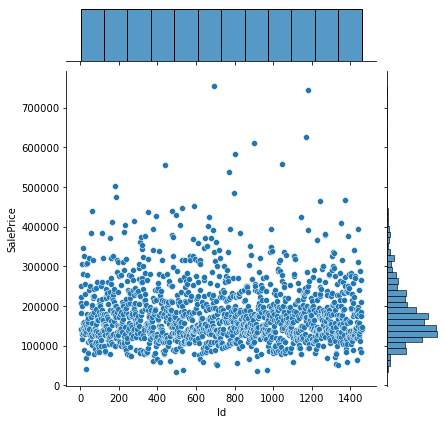

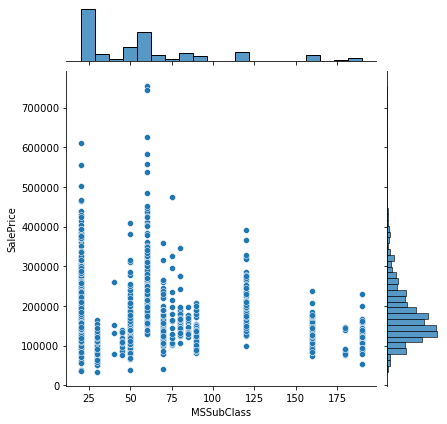

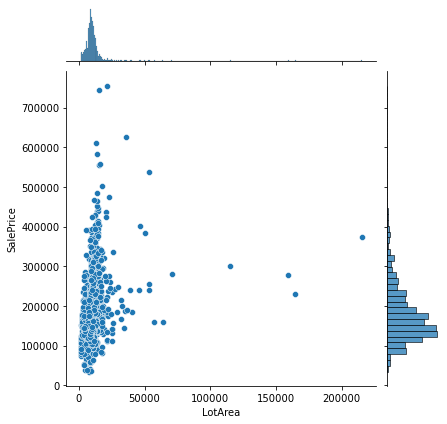

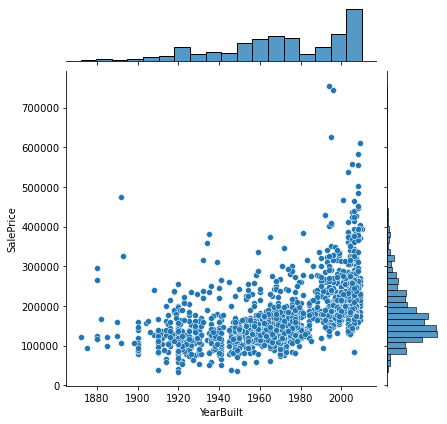

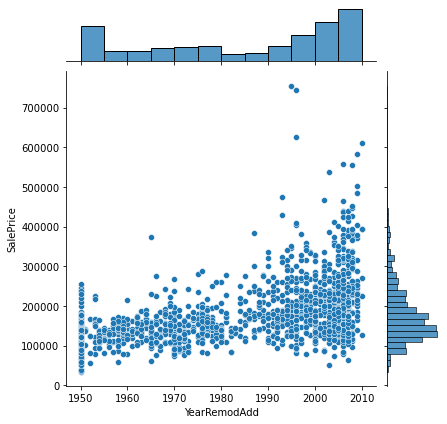

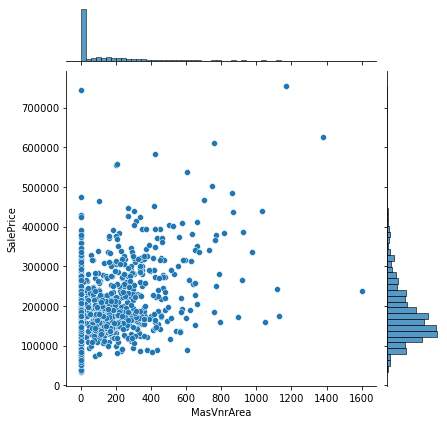

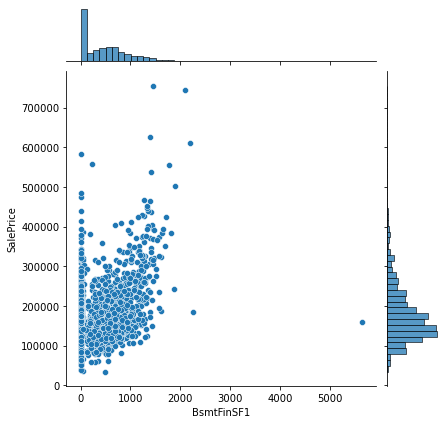

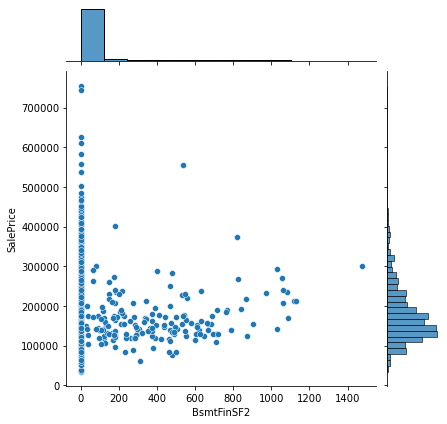

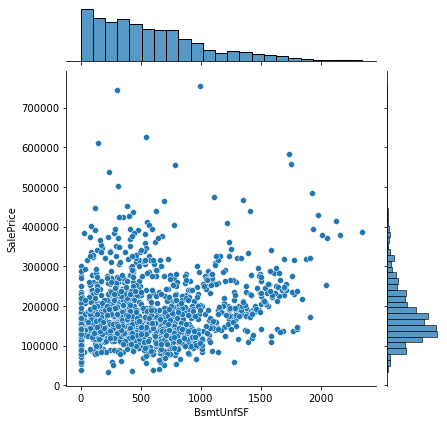

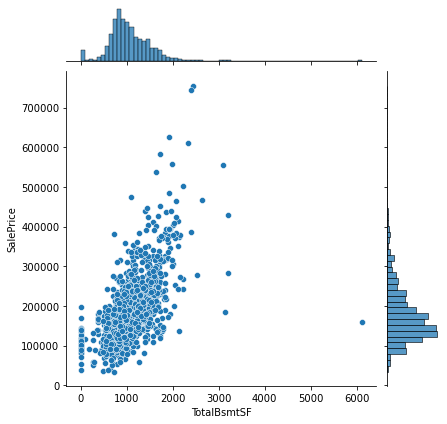

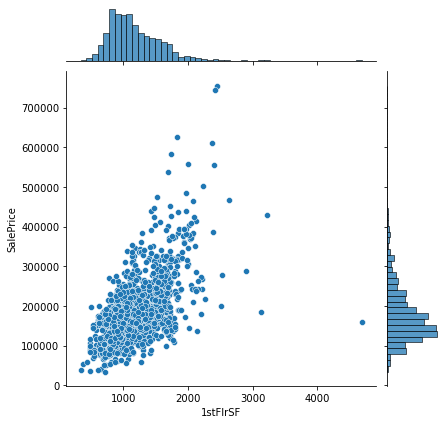

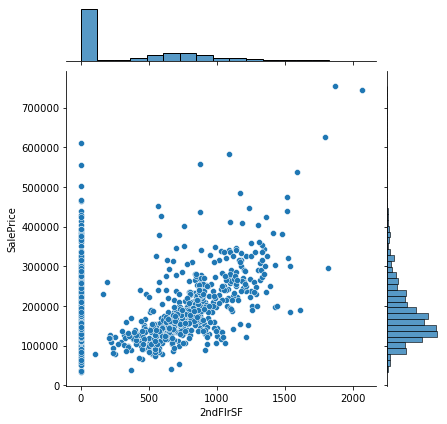

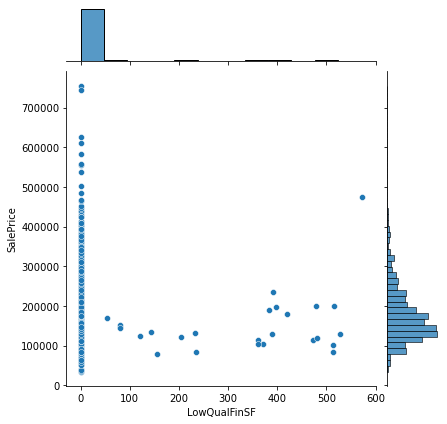

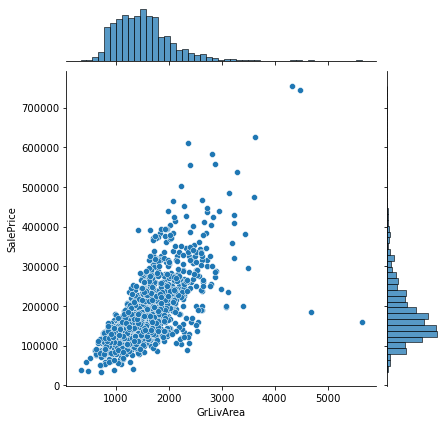

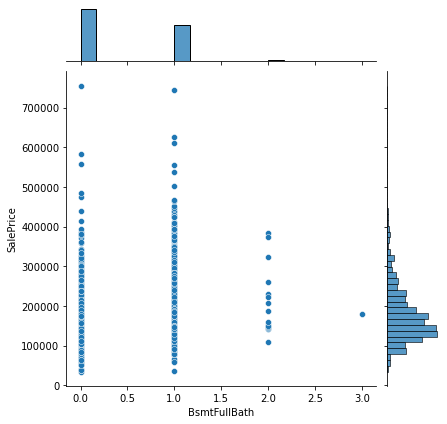

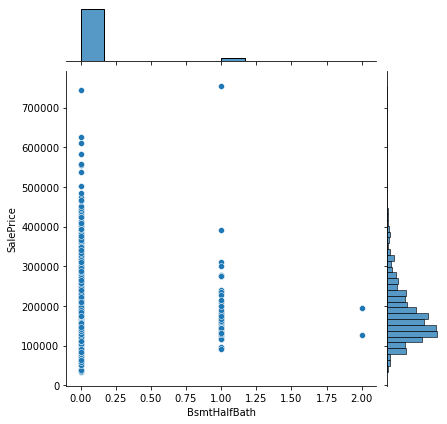

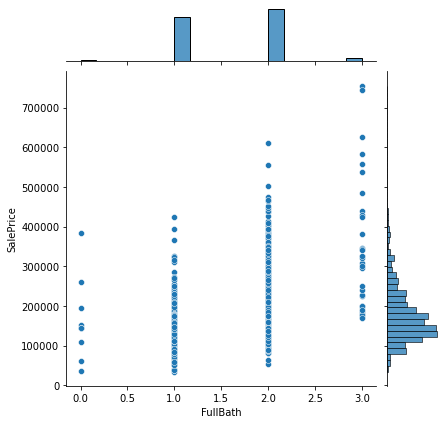

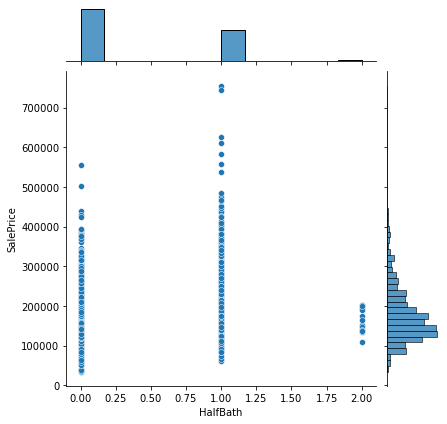

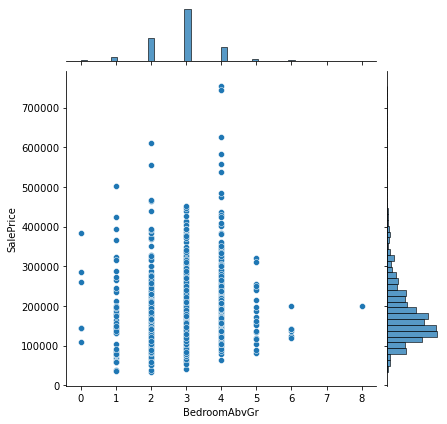

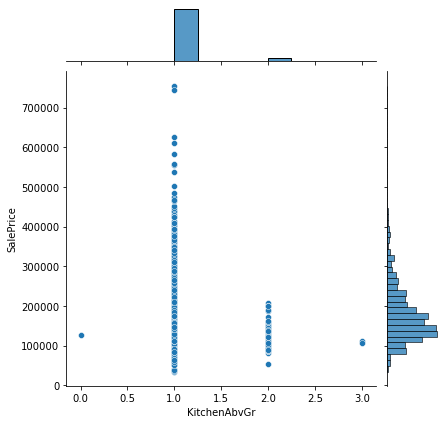

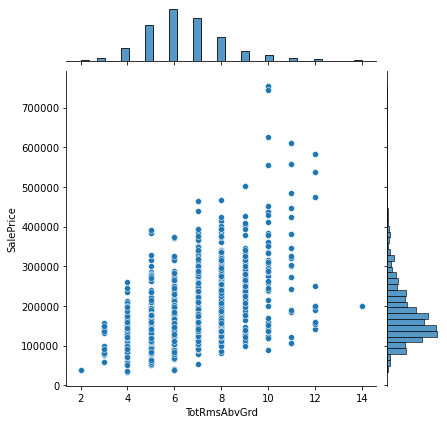

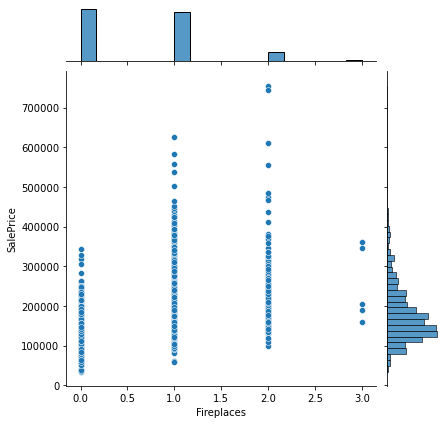

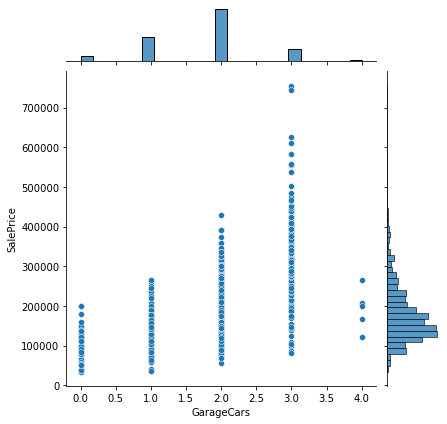

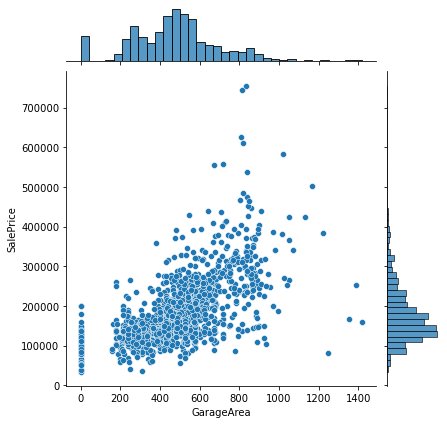

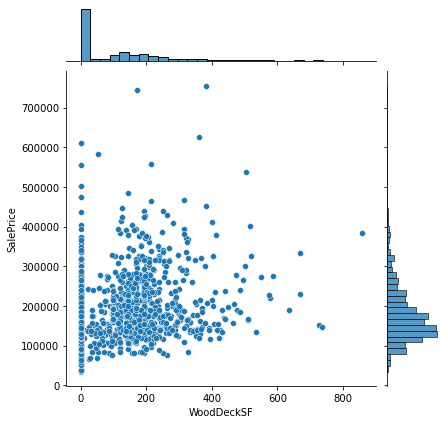

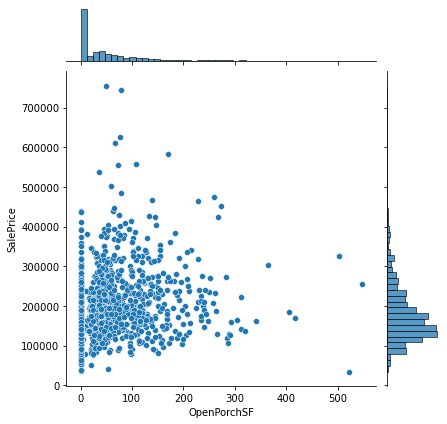

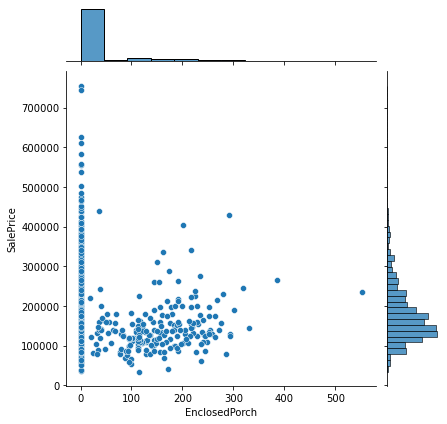

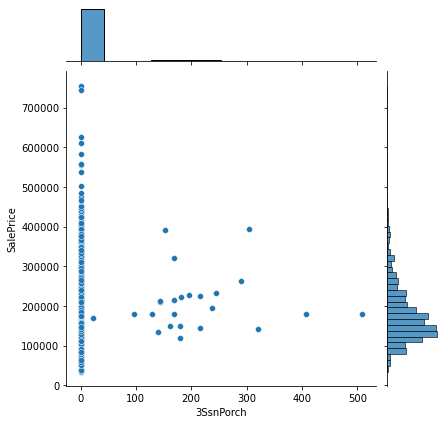

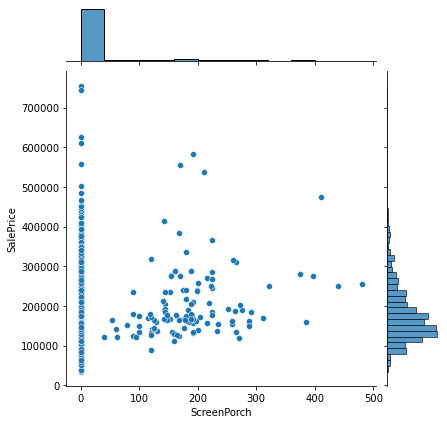

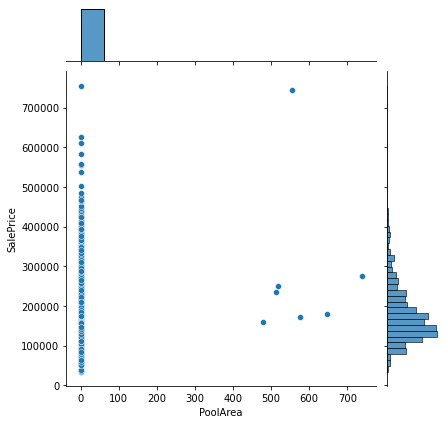

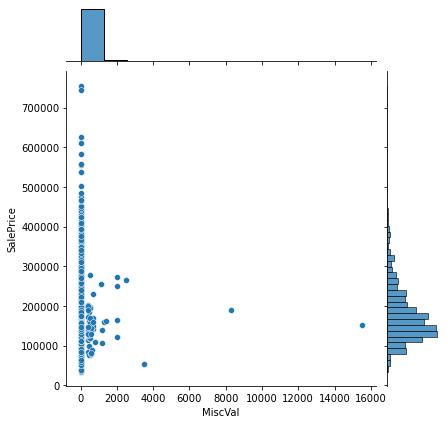

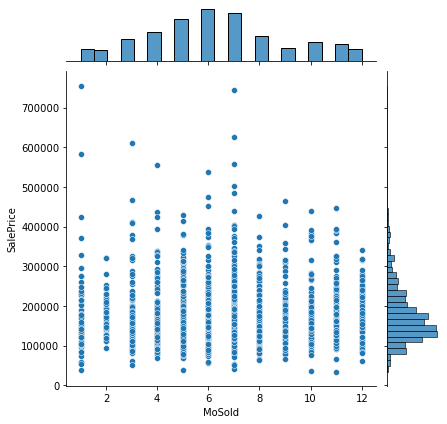

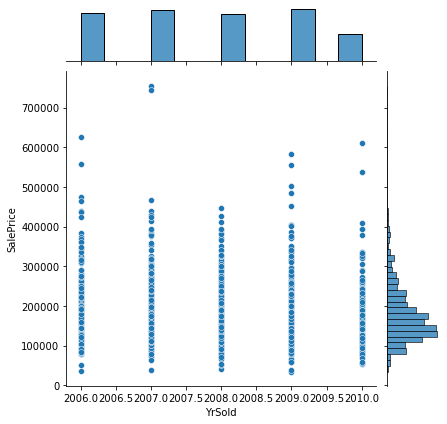

In [247]:
out_col = 'SalePrice'
for i, col in enumerate(num_col):
    num_col_analysis(i, col, out_col)


In [248]:
def cat_col_analysis(i, col_i,col_o):
    plt.figure(i)
    variables = df[[col_i]].nunique()
    plt.figure(figsize=(variables,variables/1.77))
    my_order = df[[col_i,col_o]].groupby(by=[col_i])[col_o].median().sort_values(ascending=True)
    sns.boxplot(x=col_i, y=col_o, data=df[[col_i,col_o]], order=my_order.index)

<Figure size 432x288 with 0 Axes>

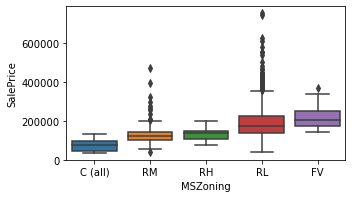

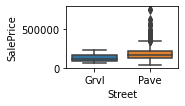

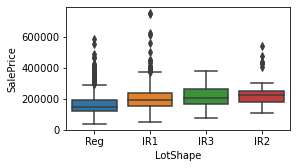

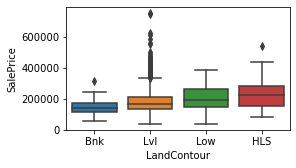

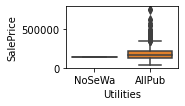

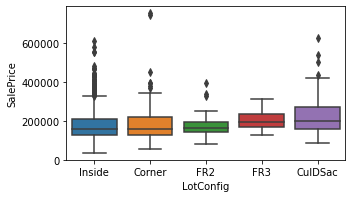

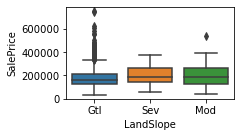

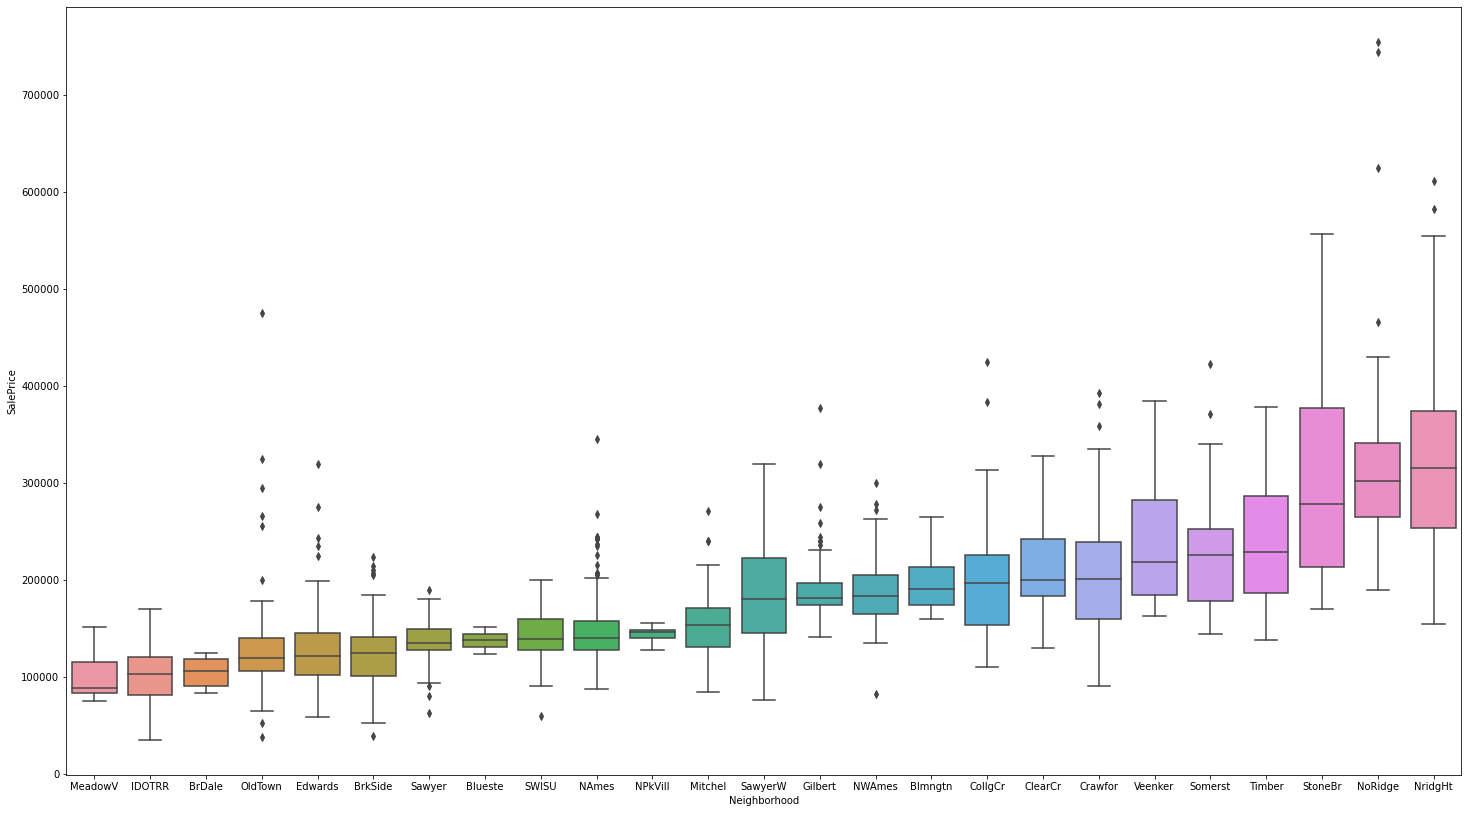

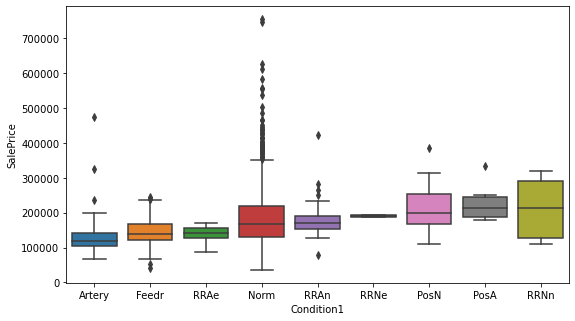

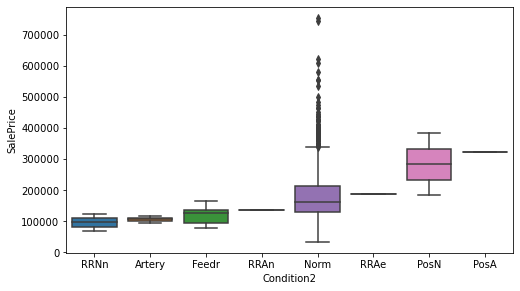

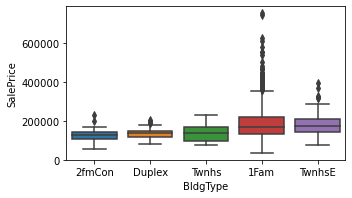

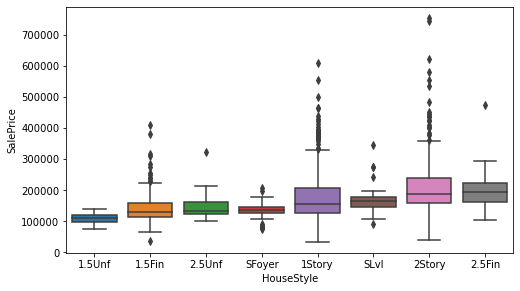

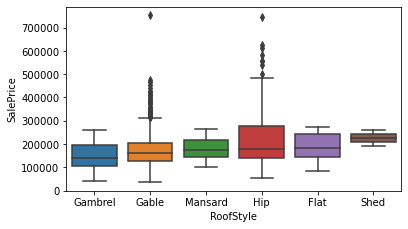

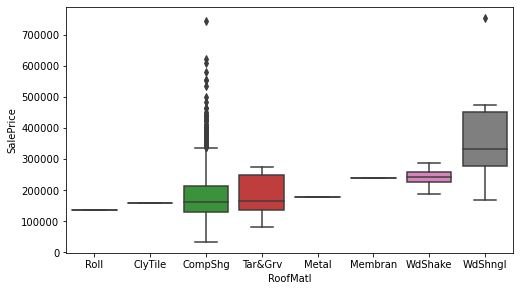

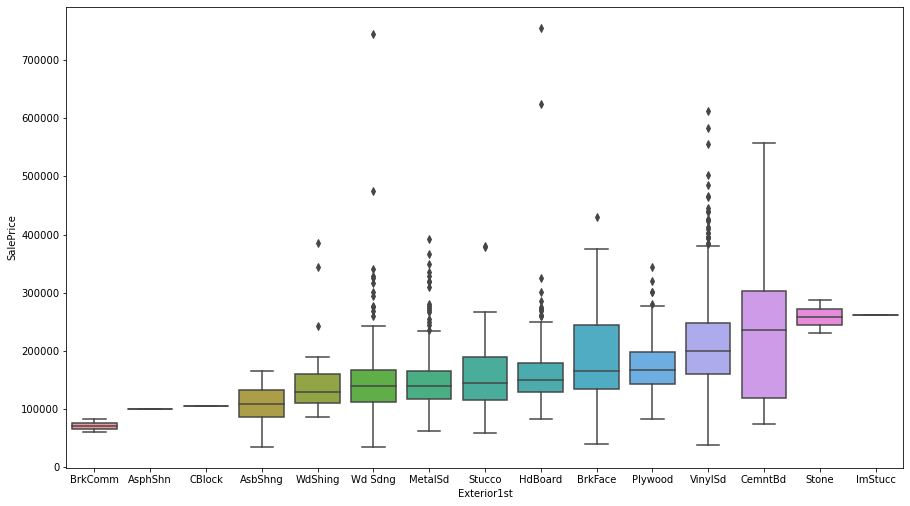

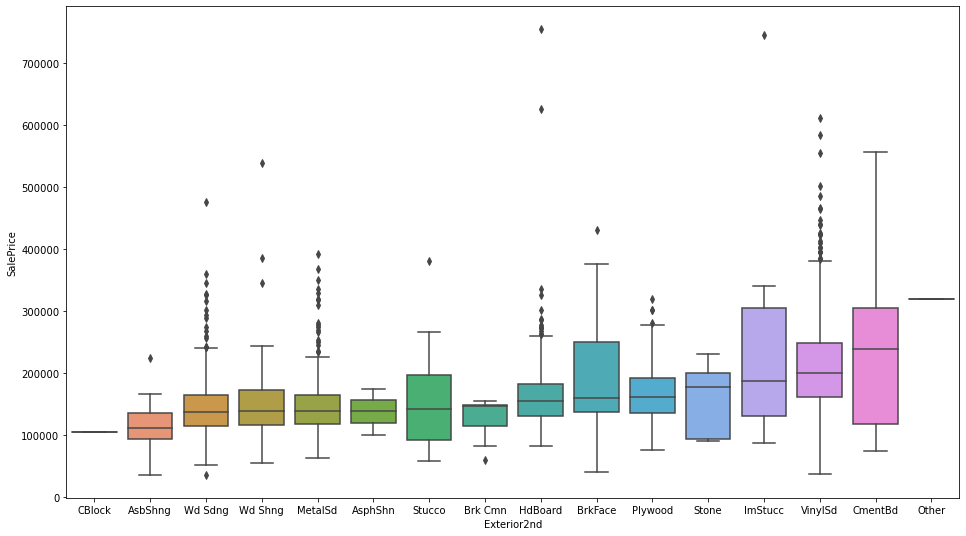

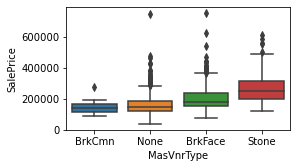

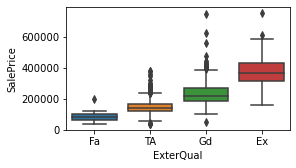

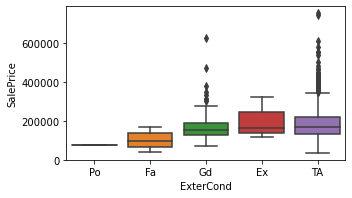

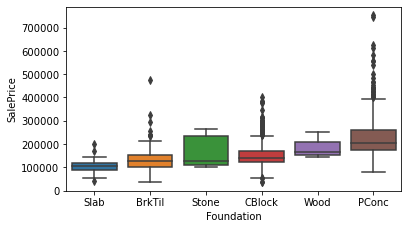

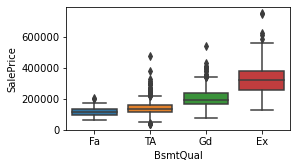

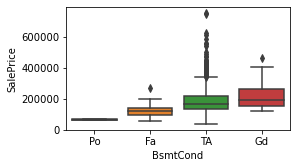

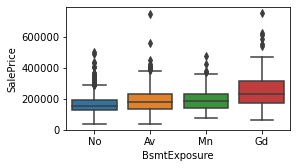

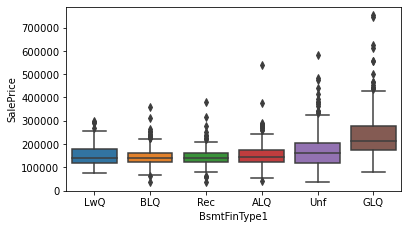

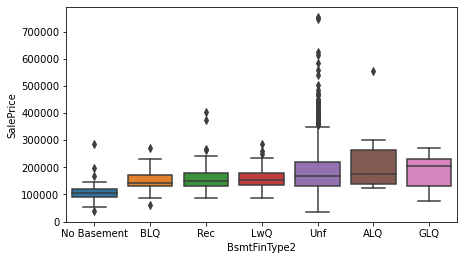

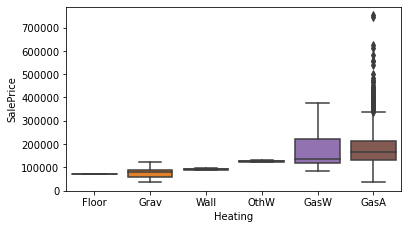

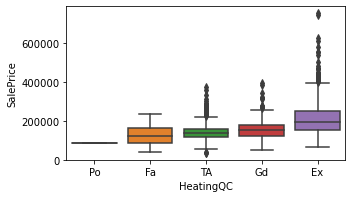

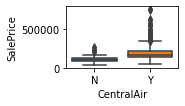

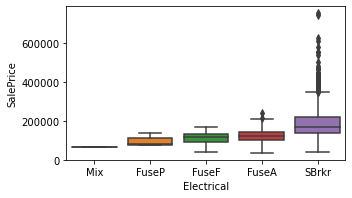

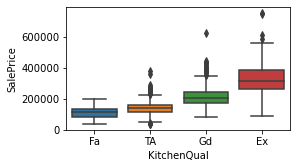

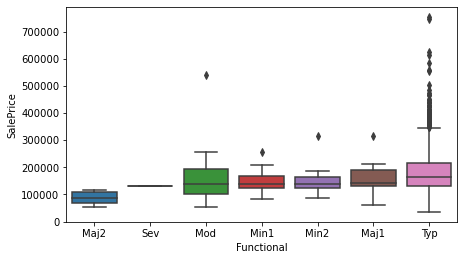

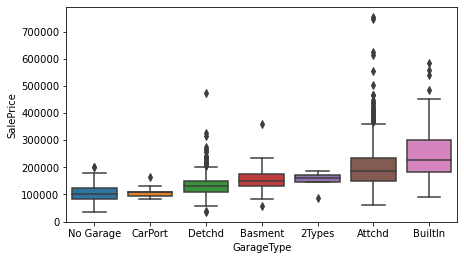

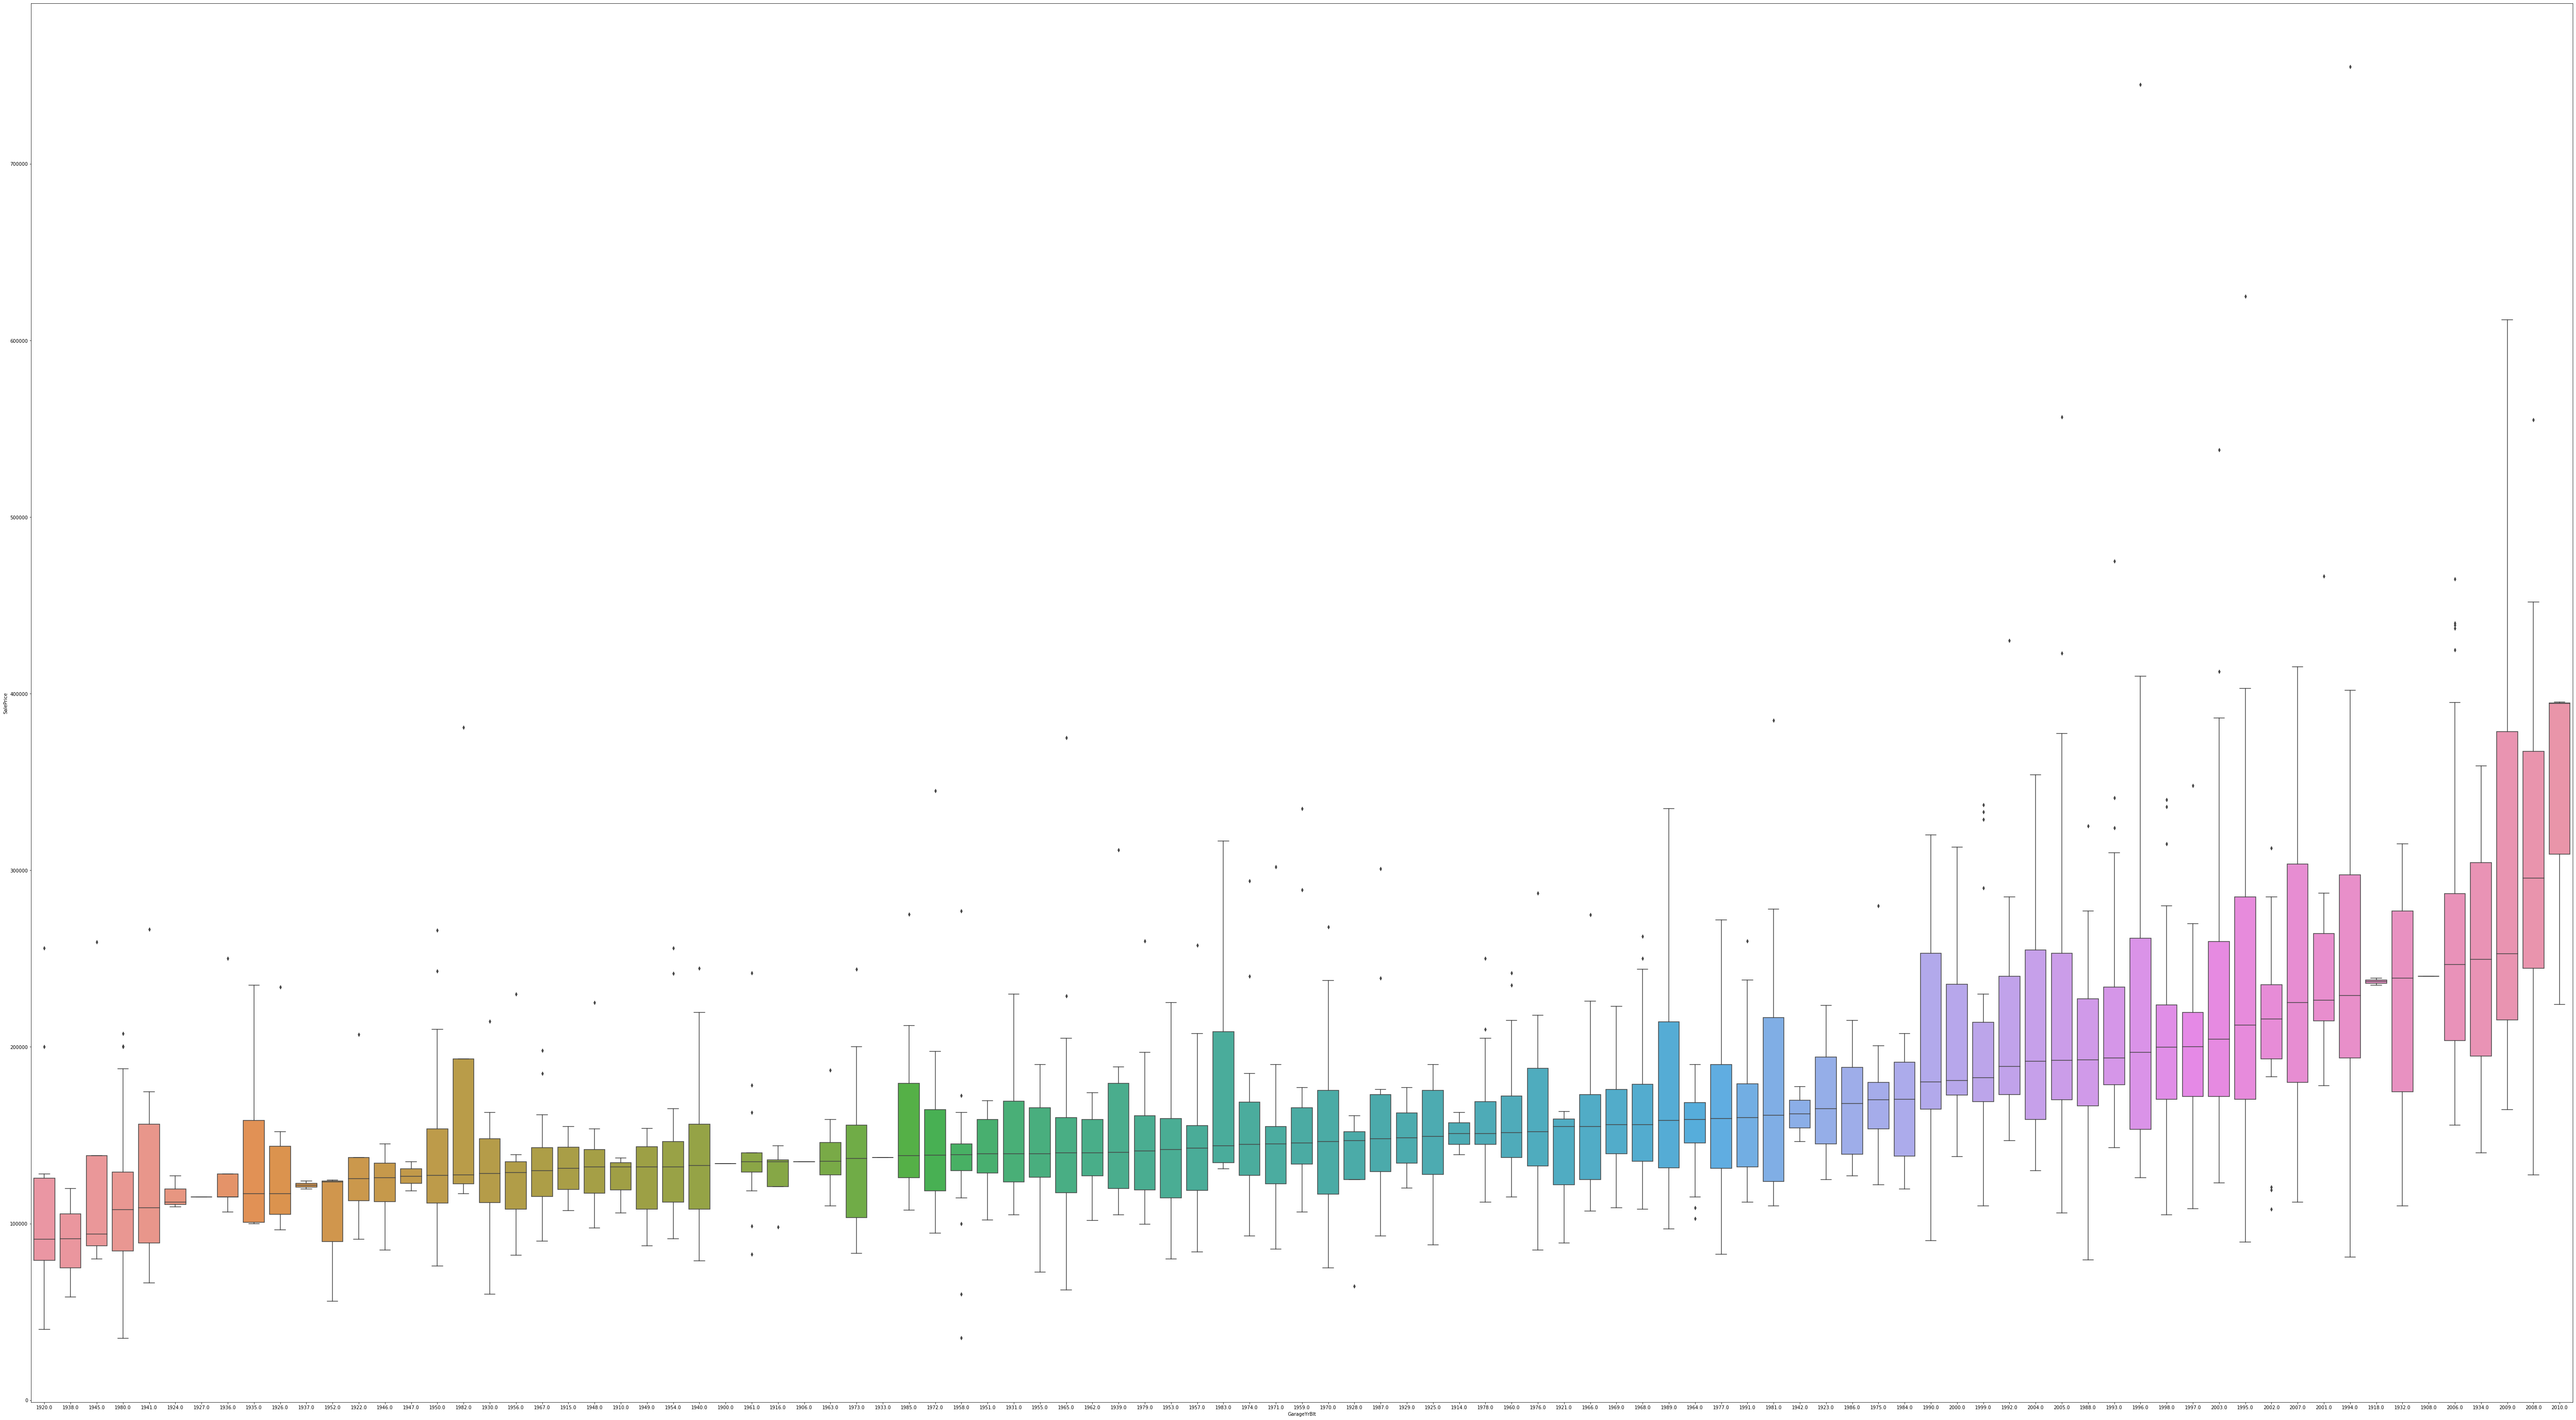

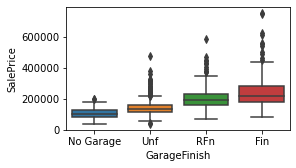

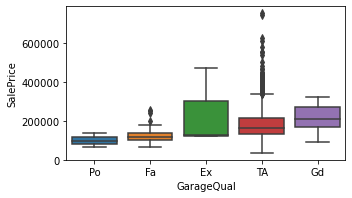

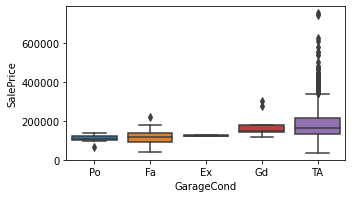

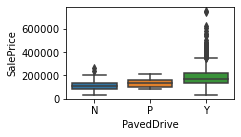

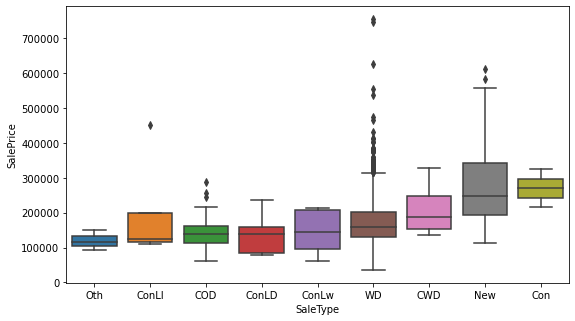

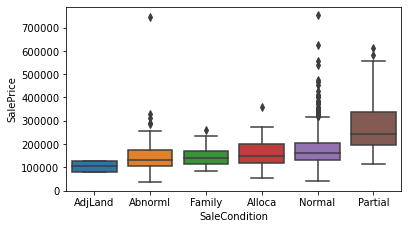

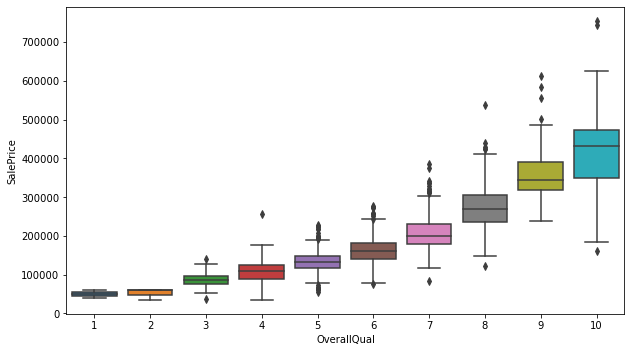

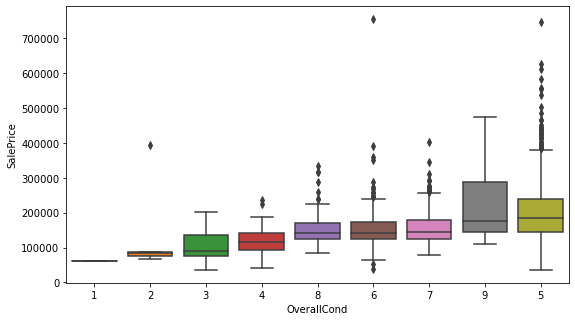

In [249]:
for i, col in enumerate(cat_col):
    cat_col_analysis(i, col, out_col)

In [250]:

df['ExterQual'] = df.ExterQual.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
df['BsmtQual'] = df.BsmtQual.map({'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
df['BsmtCond'] = df.BsmtCond.map({'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
df['BsmtExposure'] = df.BsmtExposure.map({'NA':0,'No':1,'Mn':2,'Av':3,'Gd':4})
df['BsmtFinType1'] = df.BsmtFinType1.map({'NA':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6})
df['BsmtFinType2'] = df.BsmtFinType2.map({'NA':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6})
df['HeatingQC'] = df.HeatingQC.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
df['KitchenQual'] = df.KitchenQual.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
df['GarageQual'] = df.GarageQual.map({'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
df['GarageCond'] = df.GarageCond.map({'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
df['ExterCond'] = df.ExterCond.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})


In [251]:
dfcopy = df

In [252]:
df[cat_col]

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,GarageType,GarageYrBlt,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition,OverallQual,OverallCond
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,Attchd,2003.0,RFn,3,3,Y,WD,Normal,7,5
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,Attchd,1976.0,RFn,3,3,Y,WD,Normal,6,8
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,Attchd,2001.0,RFn,3,3,Y,WD,Normal,7,5
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,Detchd,1998.0,Unf,3,3,Y,WD,Abnorml,7,5
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,Attchd,2000.0,RFn,3,3,Y,WD,Normal,8,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,...,Attchd,1999.0,RFn,3,3,Y,WD,Normal,6,5
1456,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,...,Attchd,1978.0,Unf,3,3,Y,WD,Normal,6,6
1457,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,...,Attchd,1941.0,RFn,3,3,Y,WD,Normal,7,9
1458,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,...,Attchd,1950.0,Unf,3,3,Y,WD,Normal,5,6


In [253]:
nominal_col = ['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'MasVnrArea',
 'Foundation',
 'Heating',
 'CentralAir',
 'Electrical',
 'Functional',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

        
nominal_col    

['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'MasVnrArea',
 'Foundation',
 'Heating',
 'CentralAir',
 'Electrical',
 'Functional',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

In [257]:
nominal_col.remove('MasVnrArea')

In [259]:
nominal_col.remove('GarageYrBlt')

In [260]:

df[nominal_col]

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,Foundation,Heating,CentralAir,Electrical,Functional,GarageType,GarageFinish,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,PConc,GasA,Y,SBrkr,Typ,Attchd,RFn,Y,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,CBlock,GasA,Y,SBrkr,Typ,Attchd,RFn,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,PConc,GasA,Y,SBrkr,Typ,Attchd,RFn,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,BrkTil,GasA,Y,SBrkr,Typ,Detchd,Unf,Y,WD,Abnorml
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,PConc,GasA,Y,SBrkr,Typ,Attchd,RFn,Y,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,...,PConc,GasA,Y,SBrkr,Typ,Attchd,RFn,Y,WD,Normal
1456,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,...,CBlock,GasA,Y,SBrkr,Min1,Attchd,Unf,Y,WD,Normal
1457,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,...,Stone,GasA,Y,SBrkr,Typ,Attchd,RFn,Y,WD,Normal
1458,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,...,CBlock,GasA,Y,FuseA,Typ,Attchd,Unf,Y,WD,Normal


In [261]:
dummy_cols = pd.get_dummies(df[nominal_col], drop_first = True)

In [262]:
dummy_cols

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,1,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0,0,1,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0,0,1,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
1456,0,0,1,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
1457,0,0,1,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
1458,0,0,1,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0


In [263]:
df = pd.concat([df,dummy_cols], axis = 1)
df = df.drop(['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 
 'Foundation',
 'Heating',
 'CentralAir',
 'Electrical',
 'Functional',
 'GarageType',
 
 'GarageFinish',
 'PavedDrive',
 'SaleType',
 'SaleCondition'], axis = 1 )
df

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,8450,7,5,2003,2003,196.0,3,2,...,0,0,0,0,1,0,0,0,1,0
1,2,20,9600,6,8,1976,1976,0.0,2,2,...,0,0,0,0,1,0,0,0,1,0
2,3,60,11250,7,5,2001,2002,162.0,3,2,...,0,0,0,0,1,0,0,0,1,0
3,4,70,9550,7,5,1915,1970,0.0,2,2,...,0,0,0,0,1,0,0,0,0,0
4,5,60,14260,8,5,2000,2000,350.0,3,2,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,7917,6,5,1999,2000,0.0,2,2,...,0,0,0,0,1,0,0,0,1,0
1456,1457,20,13175,6,6,1978,1988,119.0,2,2,...,0,0,0,0,1,0,0,0,1,0
1457,1458,70,9042,7,9,1941,2006,0.0,4,3,...,0,0,0,0,1,0,0,0,1,0
1458,1459,20,9717,5,6,1950,1996,0.0,2,2,...,0,0,0,0,1,0,0,0,1,0


In [264]:
df = df.drop(['Id'], axis = 1)

In [265]:
df['SalePrice']

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

In [266]:
nan_values = df[df.columns[df.isna().any()]]
nan_values

,BsmtFinType2
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0
...,...
1455,1.0
1456,3.0
1457,1.0
1458,3.0


In [267]:
df['BsmtFinType2'] = df['BsmtFinType2'].fillna(3.0)

In [453]:
df_train,df_test = train_test_split(df,train_size = 0.7,test_size = 0.3,random_state = 10 )

In [454]:
num_col.append('SalePrice')

In [455]:
num_col


['MSSubClass',
 'LotArea',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice',
 'SalePrice',
 'SalePrice',
 'SalePrice']

In [456]:
scaler = StandardScaler()
df_train[num_col] = scaler.fit_transform(df_train[num_col])
df_test[num_col] = scaler.transform(df_test[num_col])


<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

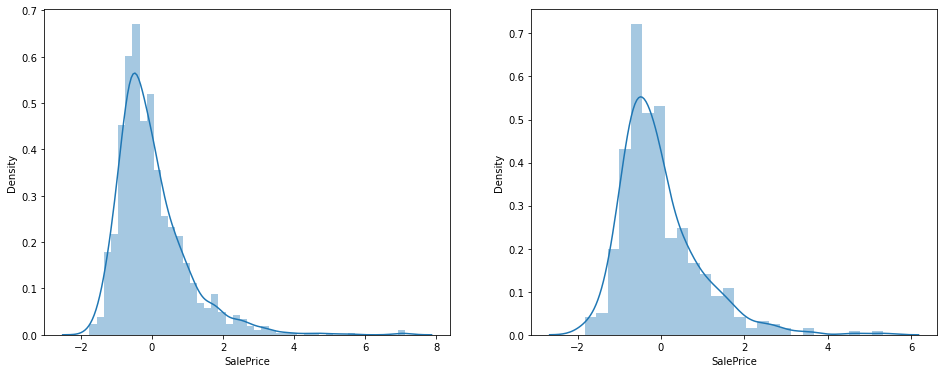

In [457]:
plt.figure(figsize=(16,6))
plt.subplot(121)
sns.distplot(df_train.SalePrice)
plt.subplot(122)
sns.distplot(df_test.SalePrice)

In [458]:
df_train

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
912,-0.636761,-0.403456,5,7,-1.535318,-1.692899,-0.574194,2,2,3,...,0,0,0,0,1,0,0,0,0,0
373,-0.871933,-0.004180,5,6,-0.611710,-1.547455,-0.574194,2,2,3,...,0,0,0,0,1,0,0,0,1,0
20,0.068755,0.312570,8,5,1.103560,1.022045,1.476158,3,2,5,...,0,0,1,0,0,0,0,0,0,1
800,0.068755,0.187232,6,5,0.839672,0.585715,-0.574194,2,2,4,...,0,0,0,0,1,0,0,0,1,0
152,0.068755,0.364580,6,5,-0.017963,-0.674795,0.785513,2,2,3,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1147,0.303927,0.116647,7,7,-1.007542,-1.692899,-0.574194,2,2,3,...,0,0,0,0,1,0,0,0,1,0
1393,3.125990,0.010503,6,7,-2.195037,0.731158,-0.574194,2,2,2,...,0,0,0,0,1,0,0,0,1,0
1344,0.068755,0.037305,7,5,1.136546,1.022045,-0.574194,3,2,4,...,0,0,1,0,0,0,0,0,0,1
527,0.068755,0.377406,9,5,1.202518,1.119007,0.871844,4,2,5,...,0,0,1,0,0,0,0,0,0,1


In [459]:
round(df_train.describe(),2)

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
count,1021.00,1021.00,1021.00,1021.00,1021.00,1021.00,1021.00,1021.00,1021.00,1021.00,...,1021.00,1021.00,1021.00,1021.00,1021.00,1021.00,1021.00,1021.00,1021.00,1021.00
mean,0.00,0.00,6.14,5.56,0.00,-0.00,0.00,2.41,2.09,3.57,...,0.00,0.00,0.08,0.00,0.86,0.00,0.01,0.01,0.82,0.09
std,1.00,1.00,1.37,1.09,1.00,1.00,1.00,0.57,0.35,0.69,...,0.07,0.05,0.28,0.04,0.34,0.03,0.08,0.12,0.38,0.28
min,-0.87,-0.83,3.00,2.00,-3.28,-1.69,-0.57,1.00,0.00,2.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,-0.87,-0.27,5.00,5.00,-0.58,-0.87,-0.57,2.00,2.00,3.00,...,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00
50%,-0.17,-0.11,6.00,5.00,0.05,0.44,-0.57,2.00,2.00,4.00,...,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00
75%,0.30,0.09,7.00,6.00,0.97,0.93,0.34,3.00,2.00,4.00,...,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00
max,3.13,18.09,10.00,9.00,1.27,1.22,8.06,4.00,4.00,5.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


In [460]:
y_train = df_train.pop('SalePrice')

In [461]:
X_train = df_train

In [462]:
print(y_train)

912    -1.166409
373    -0.731996
20      1.778909
800     0.223712
152     0.099594
          ...   
1147   -0.092789
1393   -0.235524
1344   -0.324455
527     3.280252
1149   -0.483760
Name: SalePrice, Length: 1021, dtype: float64


In [463]:
#fitting a linear regression model to the data
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [464]:
#Cut down number of features to 100 using automated approach
rfe = RFE(lm,50)
rfe.fit(X_train,y_train)

RFE(estimator=LinearRegression(), n_features_to_select=50)

In [465]:
#Columns selected by RFE and their weights
list(zip(X_train.columns,rfe.support_,rfe.ranking_))
a = list(zip(X_train.columns,rfe.support_,rfe.ranking_))
a

[('MSSubClass', False, 44),
 ('LotArea', True, 1),
 ('OverallQual', True, 1),
 ('OverallCond', False, 36),
 ('YearBuilt', False, 105),
 ('YearRemodAdd', False, 133),
 ('MasVnrArea', False, 58),
 ('ExterQual', False, 84),
 ('ExterCond', False, 37),
 ('BsmtQual', True, 1),
 ('BsmtCond', False, 89),
 ('BsmtExposure', False, 42),
 ('BsmtFinType1', False, 136),
 ('BsmtFinSF1', True, 1),
 ('BsmtFinType2', False, 82),
 ('BsmtFinSF2', False, 148),
 ('BsmtUnfSF', False, 118),
 ('TotalBsmtSF', False, 32),
 ('HeatingQC', False, 87),
 ('1stFlrSF', True, 1),
 ('2ndFlrSF', True, 1),
 ('LowQualFinSF', False, 3),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', False, 147),
 ('BsmtHalfBath', False, 144),
 ('FullBath', False, 71),
 ('HalfBath', False, 131),
 ('BedroomAbvGr', False, 33),
 ('KitchenAbvGr', False, 40),
 ('KitchenQual', True, 1),
 ('TotRmsAbvGrd', False, 47),
 ('Fireplaces', False, 98),
 ('GarageYrBlt', False, 145),
 ('GarageCars', False, 62),
 ('GarageArea', False, 26),
 ('GarageQual', False, 1

In [466]:
# listing the variables which RFE selected
rfecols = [val[0] for val in a if val[2] == True]
rfecols

['LotArea',
 'OverallQual',
 'BsmtQual',
 'BsmtFinSF1',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'KitchenQual',
 'MSZoning_FV',
 'MSZoning_RH',
 'MSZoning_RL',
 'MSZoning_RM',
 'Street_Pave',
 'LotShape_IR2',
 'LandContour_HLS',
 'LandContour_Lvl',
 'Utilities_NoSeWa',
 'LandSlope_Mod',
 'LandSlope_Sev',
 'Neighborhood_BrDale',
 'Neighborhood_NPkVill',
 'Neighborhood_NoRidge',
 'Neighborhood_NridgHt',
 'Neighborhood_OldTown',
 'Neighborhood_SWISU',
 'Neighborhood_StoneBr',
 'Condition1_RRAe',
 'Condition2_PosN',
 'Condition2_RRAe',
 'BldgType_Twnhs',
 'BldgType_TwnhsE',
 'HouseStyle_2.5Fin',
 'RoofStyle_Shed',
 'RoofMatl_CompShg',
 'RoofMatl_Tar&Grv',
 'RoofMatl_WdShake',
 'RoofMatl_WdShngl',
 'Exterior1st_BrkComm',
 'Exterior1st_ImStucc',
 'Exterior1st_Stone',
 'Exterior2nd_Brk Cmn',
 'Exterior2nd_CmentBd',
 'Exterior2nd_ImStucc',
 'Foundation_Wood',
 'Heating_OthW',
 'Functional_Typ',
 'GarageType_No Garage',
 'SaleType_Con',
 'SaleCondition_Family',
 'SaleCondition_Partial']

In [467]:
X_train = X_train[rfecols]

In [468]:
X_train

,LotArea,OverallQual,BsmtQual,BsmtFinSF1,1stFlrSF,2ndFlrSF,GrLivArea,KitchenQual,MSZoning_FV,MSZoning_RH,...,Exterior2nd_Brk Cmn,Exterior2nd_CmentBd,Exterior2nd_ImStucc,Foundation_Wood,Heating_OthW,Functional_Typ,GarageType_No Garage,SaleType_Con,SaleCondition_Family,SaleCondition_Partial
912,-0.403456,5,3,0.088138,-0.387623,-0.796711,-0.950670,2,0,0,...,0,0,0,0,0,0,0,0,0,0
373,-0.004180,5,3,-0.042207,0.384300,-0.796711,-0.380827,2,0,0,...,0,0,0,0,0,0,0,0,0,0
20,0.312570,8,5,-0.956758,-0.024514,1.995857,1.600503,3,0,0,...,0,0,0,0,0,1,0,0,0,1
800,0.187232,6,4,0.030445,-1.400772,1.661116,0.310858,3,0,0,...,0,0,0,0,0,1,0,0,0,0
152,0.364580,6,3,-0.067848,-0.179407,1.257592,0.882576,2,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1147,0.116647,7,3,-0.369137,-0.781202,0.817384,0.078422,1,0,0,...,0,0,0,0,0,1,0,0,0,0
1393,0.010503,6,2,-0.956758,0.135457,0.787578,0.730742,2,0,0,...,0,0,0,0,0,1,0,0,0,0
1344,0.037305,7,4,-0.956758,-1.116379,0.872410,-0.124023,3,0,0,...,0,0,0,0,0,1,0,0,0,1
527,0.377406,9,5,1.885189,0.782958,2.039419,2.232205,4,0,0,...,0,0,0,0,0,1,0,0,0,1


In [469]:
#fitting a linear regression model to the data
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [470]:
y_test = df_test.pop('SalePrice')

In [471]:
X_test = df_test

In [472]:
X_test = df_test[rfecols]

In [473]:
# predict train
y_train_pred = lm.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))


0.8889683208993513


In [474]:
# predict test
y_test_pred = lm.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.38345255185459504


In [475]:
model_parameter = list(lm.coef_)
model_parameter.insert(0,lm.intercept_)
cols = df_train.columns
cols.insert(0,'constant')
ridge_coef = pd.DataFrame(list(zip(cols,model_parameter)))
ridge_coef.columns = ['Feature','Coef']

In [476]:
ridge_coef.sort_values(by='Coef',ascending=False).head(10)

,Feature,Coef
37,WoodDeckSF,7.931267
35,GarageQual,7.128543
34,GarageArea,7.084511
36,GarageCond,6.915886
33,GarageCars,1.200882
22,GrLivArea,0.681578
43,MiscVal,0.596135
26,HalfBath,0.577952
23,BsmtFullBath,0.549724
9,BsmtQual,0.541574


In [477]:
folds = KFold(n_splits=10,shuffle=True,random_state= 36)

hyper_param = {'alpha':[0.001, 0.01, 0.1,1.0,2.0, 3,0, 4.0, 5.0,6.0, 7.0, 8.0, 9.0, 10.0,20.0]}

model = Lasso()

model_cv = GridSearchCV(estimator = model,
                        param_grid=hyper_param,
                        scoring='r2',
                        cv=folds,
                        verbose=1,
                        return_train_score=True
                       )

model_cv.fit(X_train,y_train)

Fitting 10 folds for each of 15 candidates, totalling 150 fits


GridSearchCV(cv=KFold(n_splits=10, random_state=36, shuffle=True),
             estimator=Lasso(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 1.0, 2.0, 3, 0, 4.0, 5.0,
                                   6.0, 7.0, 8.0, 9.0, 10.0, 20.0]},
             return_train_score=True, scoring='r2', verbose=1)

In [478]:
model_cv.best_params_

{'alpha': 0.001}

In [479]:
lm = Lasso(alpha=0.001)
lm.fit(X_train,y_train)

y_train_pred = lm.predict(X_train)
print(r2_score(y_true=y_train,y_pred=y_train_pred))

y_test_pred  = lm.predict(X_test)
print(r2_score(y_true=y_test,y_pred=y_test_pred))

0.859450287458095
0.820260736342588


In [480]:
model_param = list(lm.coef_)
model_param.insert(0,lm.intercept_)
cols = df_train.columns
cols.insert(0,'const')
lasso_coef = pd.DataFrame(list(zip(cols,model_param)))
lasso_coef.columns = ['Feature','Coef']

In [481]:
lasso_coef.sort_values(by='Coef',ascending=False).head(10)

,Feature,Coef
37,WoodDeckSF,2.447120
34,GarageArea,1.596773
35,GarageQual,1.463032
36,GarageCond,1.322350
22,GrLivArea,0.742614
26,HalfBath,0.578429
23,BsmtFullBath,0.542044
15,BsmtFinSF2,0.316140
18,HeatingQC,0.248968
43,MiscVal,0.219513


In [482]:
folds = KFold(n_splits=10,shuffle=True,random_state= 35)

hyper_param = {'alpha':[0.001, 0.01, 0.1,1.0,2.0, 3,0, 4.0, 5.0,6.0, 7.0, 8.0, 9.0, 10.0,20.0]}

model = Ridge()

model_cv = GridSearchCV(estimator = model,
                        param_grid=hyper_param,
                        scoring='r2',
                        cv=folds,
                        verbose=1,
                        return_train_score=True
                       )

model_cv.fit(X_train,y_train)

Fitting 10 folds for each of 15 candidates, totalling 150 fits


GridSearchCV(cv=KFold(n_splits=10, random_state=35, shuffle=True),
             estimator=Ridge(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 1.0, 2.0, 3, 0, 4.0, 5.0,
                                   6.0, 7.0, 8.0, 9.0, 10.0, 20.0]},
             return_train_score=True, scoring='r2', verbose=1)

In [483]:
model_cv.best_params_

{'alpha': 2.0}

In [484]:
lm = Ridge(alpha=2)
lm.fit(X_train,y_train)

y_train_pred = lm.predict(X_train)
print(r2_score(y_true=y_train,y_pred=y_train_pred))

y_test_pred  = lm.predict(X_test)
print(r2_score(y_true=y_test,y_pred=y_test_pred))

0.8512838376727829
0.8393170143165656


In [485]:
model_parameter = list(lm.coef_)
model_parameter.insert(0,lm.intercept_)
cols = df_train.columns
cols.insert(0,'constant')
ridge_coef = pd.DataFrame(list(zip(cols,model_parameter)))
ridge_coef.columns = ['Feature','Coef']

In [486]:
ridge_coef.sort_values(by='Coef',ascending=False).head(10)

,Feature,Coef
37,WoodDeckSF,1.172230
22,GrLivArea,0.759794
26,HalfBath,0.592920
23,BsmtFullBath,0.558257
34,GarageArea,0.521487
35,GarageQual,0.406878
43,MiscVal,0.367469
15,BsmtFinSF2,0.364225
36,GarageCond,0.329377
18,HeatingQC,0.297423
